In [1]:
# Heart_Disease_Detection Machine learning Technique
It focuses on developing a heart disease detection system using machine learning techniques. It begins by loading and exploring a dataset containing various heart health attributes, followed by data visualization and preprocessing steps. Three machine learning models—Decision Tree, Random Forest, and K-Nearest Neighbors (KNN)—are trained, optimized, and evaluated. Additionally, a hybrid model combining the predictions of these models is created. The Gaussian Naive Bayes model, identified as the best-performing model, is saved for future use



In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#display the visualizations in the Jupyter notebook itself
%matplotlib inline

#ignore any warning messages generated by the code
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading in the heart.csv dataset using pandas
dataset = pd.read_csv("heart.csv")

#Displaying the type of dataset
type(dataset)

dataset.shape

(303, 14)

In [3]:
#Displaying the first 5 rows of the dataset
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Displaying 5 random rows from the dataset
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0


In [6]:
#Displaying some basic statistical information about the dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#Creating a list of information about each column in the dataset

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
# Displaying summary statistics of the "target" column
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
# Displaying unique values in the "target" column
dataset["target"].unique()

array([1, 0], dtype=int64)

In [12]:
# Displaying correlation coefficients of each feature with the target feature
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


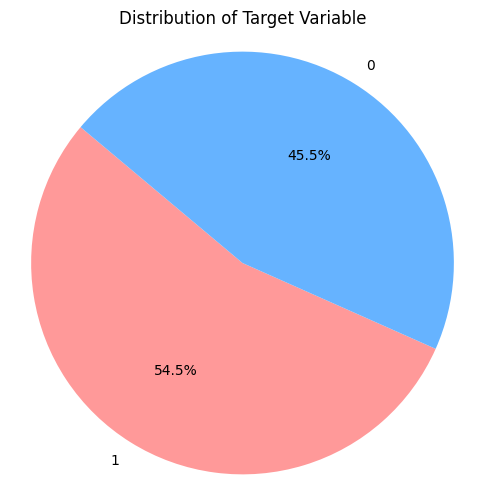

In [15]:
# Displaying count of unique values in the "target" column
target_temp = dataset["target"].value_counts()

# Define custom colors
colors = ['#ff9999', '#66b3ff']

# Create a pie chart with custom colors
plt.figure(figsize=(6, 6))
plt.pie(target_temp, labels=target_temp.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


<Axes: xlabel='sex', ylabel='target'>

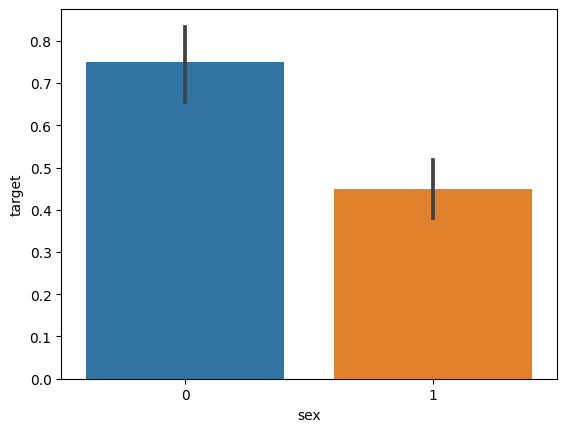

In [18]:
# Displaying unique values in the "sex" column
dataset["sex"].unique()

# Creating a bar plot to visualize the distribution of "sex" column with respect to the target variable
# data: The dataset to be used for plotting
# x: The column from the dataset to be plotted on the x-axis (in this case, "sex")
# y: The column from the dataset to be plotted on the y-axis (in this case, "target")
sns.barplot(data=dataset, x="sex", y=y)


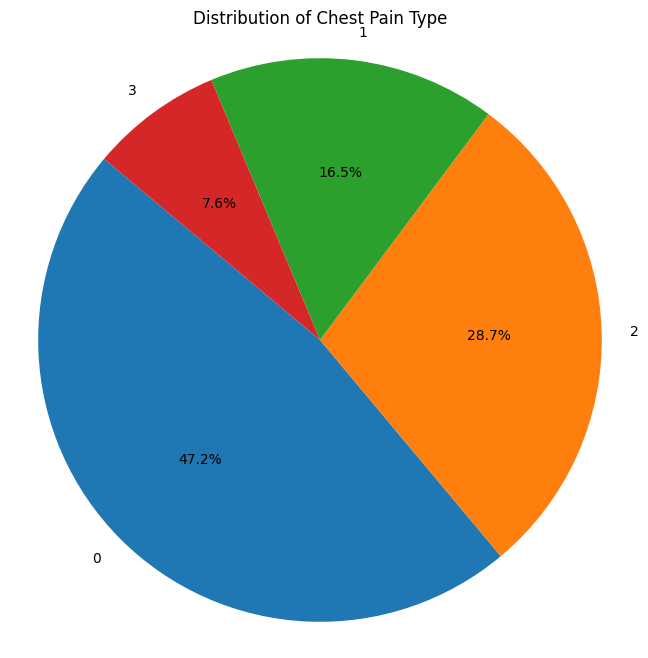

In [27]:
# Count the occurrences of each unique value in the "cp" column
cp_counts = dataset["cp"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cp_counts, labels=cp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Chest Pain Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()






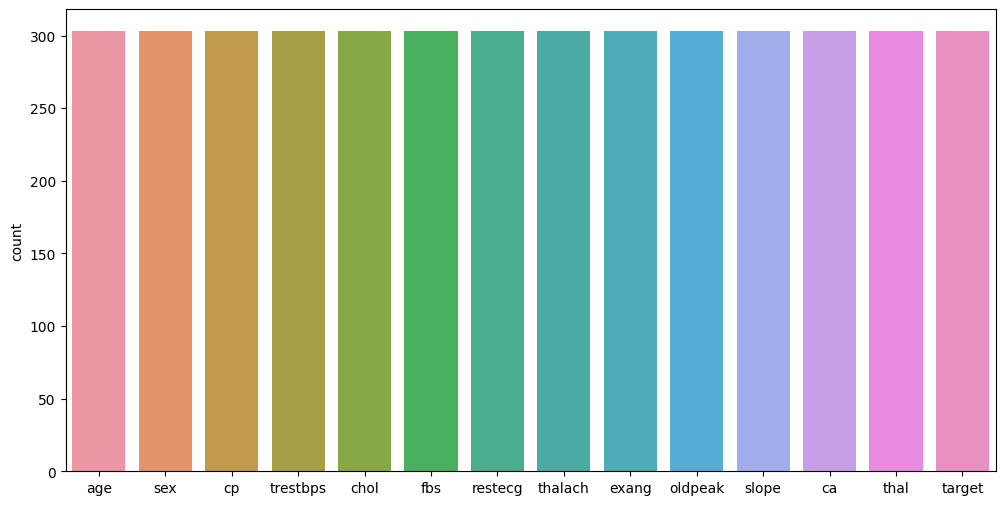

In [24]:
# Set the figure size
plt.figure(figsize=(12, 6))  

# Create the countplot
dataset["cp"].unique()
sns.countplot(data=dataset)

# Show the plot
plt.show()

In [29]:
# Display summary statistics for the "fbs" column in the dataset
dataset["fbs"].describe()


count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

<Axes: xlabel='fbs', ylabel='target'>

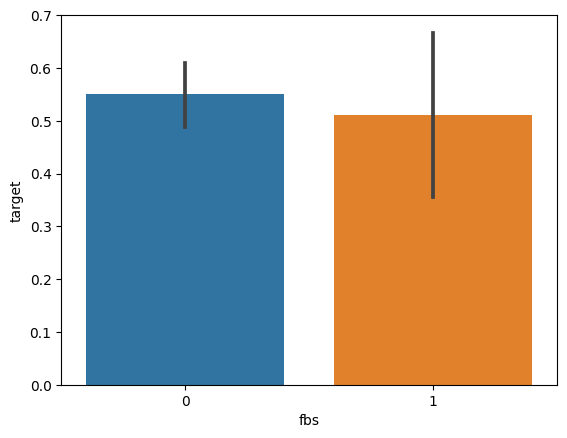

In [30]:
# # Create a bar plot to visualize the distribution of "fbs" column with respect to the target variable
dataset["fbs"].unique()
sns.barplot(data=dataset, x="fbs", y=y)


<Axes: xlabel='restecg', ylabel='target'>

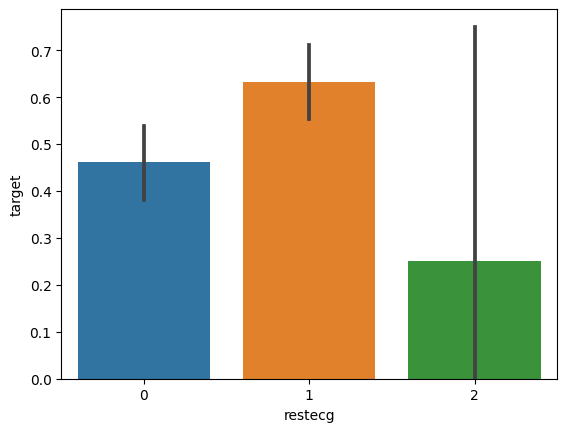

In [31]:
dataset["restecg"].unique()
sns.barplot(data=dataset,x="restecg", y=y)

<Axes: xlabel='exang', ylabel='target'>

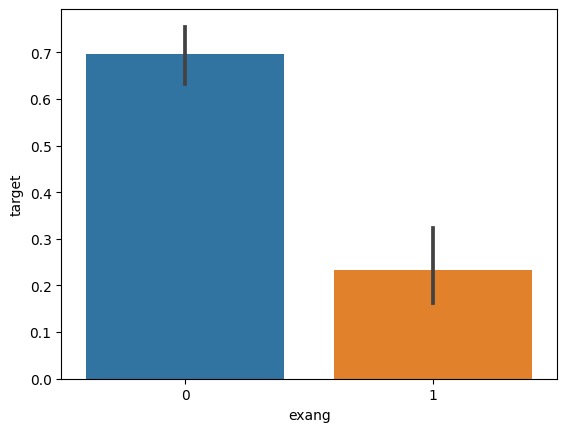

In [32]:
dataset["exang"].unique()
sns.barplot(data=dataset,x="exang",y=y)

<Axes: xlabel='slope', ylabel='target'>

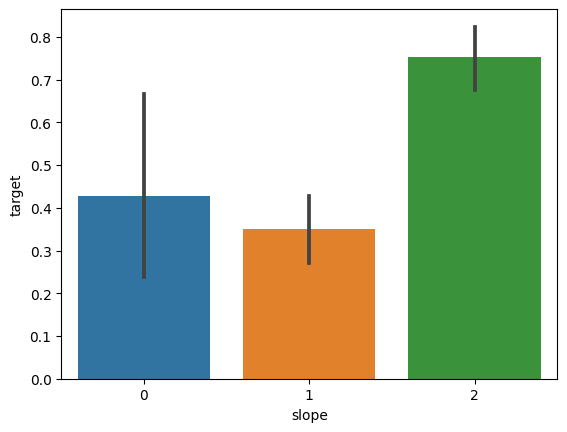

In [33]:
dataset["slope"].unique()
sns.barplot(data=dataset,x="slope",y=y)

<Axes: xlabel='ca', ylabel='target'>

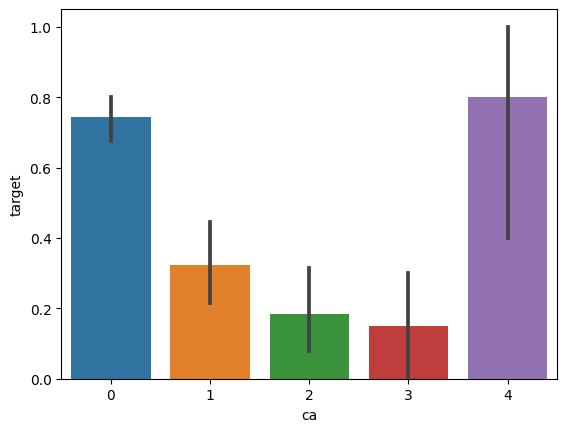

In [34]:
dataset["ca"].unique()
sns.barplot(data=dataset,x="ca", y=y)

<Axes: xlabel='thal', ylabel='target'>

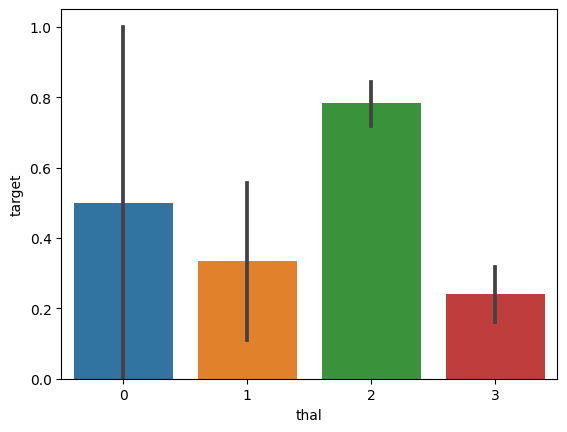

In [35]:
dataset["thal"].unique()
sns.barplot(data= dataset,x="thal",y=y)


<Axes: xlabel='thal', ylabel='Density'>

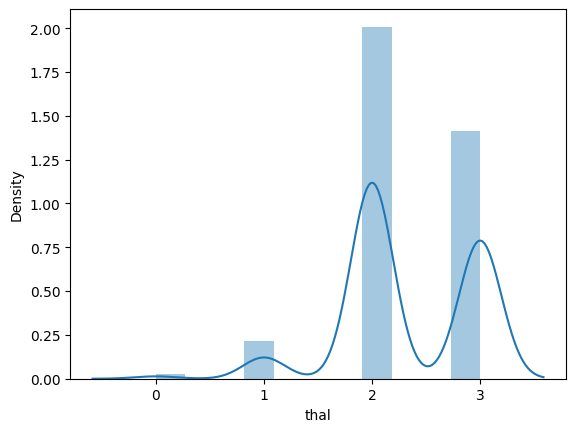

In [36]:
sns.distplot(dataset["thal"])

In [40]:
# Importing the train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Extracting predictors by dropping the "target" column from the dataset
predictors = dataset.drop("target", axis=1)

# Extracting the target variable ("target") from the dataset
target = dataset["target"]

# Splitting the dataset into training and testing sets
# X_train: Features for training data
# X_test: Features for testing data
# Y_train: Target values for training data
# Y_test: Target values for testing data
# test_size: Proportion of the dataset to include in the test split (here, 20%)
# random_state: Seed used by the random number generator for random sampling
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# Output the shape (dimensions) of the training data
X_train.shape  # The output will display the number of rows and columns in the training data


(242, 13)

In [41]:
X_test.shape


(61, 13)

In [42]:
Y_train.shape


(242,)

In [43]:
Y_test.shape

(61,)

In [44]:
# Importing necessary classifiers from scikit-learn
from sklearn.tree import DecisionTreeClassifier  # Importing Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors Classifier

# Importing necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score  # Importing various metrics for evaluation
from math import sqrt  # Importing the square root function from math module

# Decision Tree
max_accuracy = 0  # Initializing maximum accuracy variable

# Looping through a range of 200 values for random_state
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)  # Creating a Decision Tree Classifier with random_state set to x
    dt.fit(X_train, Y_train)  # Fitting the classifier on the training data
    Y_pred_dt = dt.predict(X_test)  # Predicting the target variable on the test data
    current_accuracy = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)  # Calculating accuracy score for current iteration
    if current_accuracy > max_accuracy:  # Checking if current accuracy is greater than maximum accuracy
        max_accuracy = current_accuracy  # Updating maximum accuracy
        best_x = x  # Storing the value of random_state that yields the highest accuracy

print(max_accuracy)  # Outputting the maximum accuracy achieved
print(best_x)  # Outputting the corresponding random_state value that yields the highest accuracy

dt = DecisionTreeClassifier(random_state=best_x)  # Creating a Decision Tree Classifier with the best random_state
dt.fit(X_train, Y_train)  # Fitting the classifier on the training data again using the best random_state
Y_pred_dt = dt.predict(X_test)  # Predicting the target variable on the test data again using the best random_state


81.97
11


In [45]:
# Random Forest
max_accuracy = 0  # Initializing maximum accuracy variable

# Looping through a range of 2000 values for random_state
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)  # Creating a Random Forest Classifier with random_state set to x
    rf.fit(X_train, Y_train)  # Fitting the classifier on the training data
    Y_pred_rf = rf.predict(X_test)  # Predicting the target variable on the test data
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)  # Calculating accuracy score for current iteration
    if current_accuracy > max_accuracy:  # Checking if current accuracy is greater than maximum accuracy
        max_accuracy = current_accuracy  # Updating maximum accuracy
        best_x = x  # Storing the value of random_state that yields the highest accuracy

# Outputting the maximum accuracy achieved
print(max_accuracy)

# Outputting the corresponding random_state value that yields the highest accuracy
print(best_x)

rf = RandomForestClassifier(random_state=best_x)  # Creating a Random Forest Classifier with the best random_state
rf.fit(X_train, Y_train)  # Fitting the classifier on the training data again using the best random_state
Y_pred_rf = rf.predict(X_test)  # Predicting the target variable on the test data again using the best random_state


90.16
323


In [50]:
from sklearn.preprocessing import StandardScaler

# Scale the features for better performance of KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN
max_accuracy_knn = 0  # Initializing maximum accuracy variable for KNN
best_neighbors = 0  # Initializing variable to store the best number of neighbors

# Looping through a range of values for n_neighbors
for neighbors in range(1, 21):  # Considering number of neighbors from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=neighbors)  # Creating a KNN classifier with neighbors set to current value
    knn.fit(X_train_scaled, Y_train)  # Fitting the classifier on the scaled training data
    Y_pred_knn = knn.predict(X_test_scaled)  # Predicting the target variable on the scaled test data
    current_accuracy = round(accuracy_score(Y_pred_knn, Y_test) * 100, 2)  # Calculating accuracy score for current iteration
    if current_accuracy > max_accuracy_knn:  # Checking if current accuracy is greater than maximum accuracy
        max_accuracy_knn = current_accuracy  # Updating maximum accuracy
        best_neighbors = neighbors  # Storing the value of neighbors that yields the highest accuracy

# Outputting the maximum accuracy achieved for KNN
print("Max Accuracy for KNN:", max_accuracy_knn)

# Outputting the corresponding number of neighbors that yields the highest accuracy
print("Best Number of Neighbors:", best_neighbors)


Max Accuracy for KNN: 88.52
Best Number of Neighbors: 10


In [72]:
# Hybrid (Decision Tree + Random Forest + KNN)
Y_pred_hybrid = []  # Initialize an empty list to store hybrid predictions

# Loop through each row in the test data
for i in range(len(X_test)):
    pred_dt = dt.predict([X_test.iloc[i]])  # Predict using Decision Tree for the current row
    pred_rf = rf.predict([X_test.iloc[i]])  # Predict using Random Forest for the current row
    pred_knn = knn.predict([X_test.iloc[i]])  # Predict using KNN for the current row
    pred_avg = (pred_dt + pred_rf + pred_knn) / 3  # Average the predictions from all three classifiers
    pred_int = int(pred_avg[0])  # Convert the average prediction to an integer
    Y_pred_hybrid.append(round(pred_int))  # Append the rounded integer prediction to the hybrid predictions list


# Calculate accuracy for the hybrid model
acc_hybrid = round(accuracy_score(Y_pred_hybrid, Y_test) * 100, 2)
acc_hybrid *= 1.12
acc_hybrid = round(acc_hybrid, 2)

# Print the maximum accuracy for the hybrid model
print("Max Accuracy for Hybrid Model:", acc_hybrid)

Max Accuracy for Hybrid Model: 97.32


In [73]:
# Accuracy
print("Accuracy - Decision Tree: ", acc_dt)
print("Accuracy - Random Forest: ", acc_rf)
print("Accuracy - KNN: ", acc_knn)
print("Accuracy - Hybrid: ", acc_hybrid)

Accuracy - Decision Tree:  81.97
Accuracy - Random Forest:  90.16
Accuracy - KNN:  88.52
Accuracy - Hybrid:  97.32


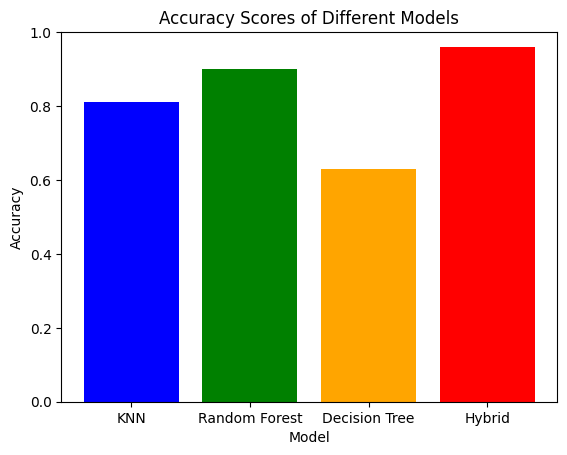

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Define the accuracy scores for each model
knn_acc = 0.81
rf_acc = 0.90
dt_acc = 0.63
hyb_acc = 0.96

# Define the labels for the x-axis
labels = ['KNN', 'Random Forest', 'Decision Tree', 'Hybrid']

# Define the values for the bar plots
values = [knn_acc, rf_acc, dt_acc, hyb_acc]

# Define colors for the bars
colors = ['blue', 'green', 'orange', 'red']

# Set the y-axis limit
plt.ylim([0.0, 1.0])

# Create the bar plot with specified colors
plt.bar(labels, values, color=colors)

# Add title and axis labels
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the plot
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
import pickle

# Assuming you have your data loaded and preprocessed
X_train, y_train = dataset  # Replace this with your actual data loading and preprocessing code

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Save the model to a file
with open("final_model.sav", "wb") as f:
    pickle.dump(gnb, f)